# Case Study of equipment’s signal quality

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks')

PROJECT OBJECTIVE:  The need is to build a regressor which can use these parameters to determine the signal strength or
quality [as number].

DATA DESCRIPTION: The data set contains information on various signal tests performed: 
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

In [3]:
#checking tensorflow version
import tensorflow as tf
tf.__version__

'2.4.1'

1. Import data. 

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from keras.optimizers import SGD
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU

In [5]:
#Read the data as data frame
def signal_csv_import():
    df_sgnl = pd.read_csv('Signal.csv')
    print("Signal.csv loaded")
    return df_sgnl

df_sgnl = signal_csv_import()
df_sgnl.head()

Signal.csv loaded


Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

In [6]:
def displaySignal():
  return df_sgnl

2. Data analysis & visualisation 

In [7]:
# Shape
df_sgnl.shape

(1599, 12)

In [8]:
df_sgnl.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

There are 1599 rows and 12 columns in data

In [9]:
# info
df_sgnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Signal Strength is integer and all other attributes are float.

In [10]:
# check nan 
df_sgnl.isin([np.nan]).any()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

In [11]:
# Checking Null values
df_sgnl.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

There are no null values present in the dataset

In [12]:
# 5 point summary of numerical attributes
df_sgnl.describe().T

count       mean        std  ...       50%        75%        max
Parameter 1      1599.0   8.319637   1.741096  ...   7.90000   9.200000   15.90000
Parameter 2      1599.0   0.527821   0.179060  ...   0.52000   0.640000    1.58000
Parameter 3      1599.0   0.270976   0.194801  ...   0.26000   0.420000    1.00000
Parameter 4      1599.0   2.538806   1.409928  ...   2.20000   2.600000   15.50000
Parameter 5      1599.0   0.087467   0.047065  ...   0.07900   0.090000    0.61100
Parameter 6      1599.0  15.874922  10.460157  ...  14.00000  21.000000   72.00000
Parameter 7      1599.0  46.467792  32.895324  ...  38.00000  62.000000  289.00000
Parameter 8      1599.0   0.996747   0.001887  ...   0.99675   0.997835    1.00369
Parameter 9      1599.0   3.311113   0.154386  ...   3.31000   3.400000    4.01000
Parameter 10     1599.0   0.658149   0.169507  ...   0.62000   0.730000    2.00000
Parameter 11     1599.0  10.422983   1.065668  ...  10.20000  11.100000   14.90000
Signal_Strength  1599.0   5.636023   0.807569  ...   6.00000   6.000000    8.00000

[12 rows x 8 columns]

In [13]:
df_sgnl['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

Observation :
  Parameter 7 has highest std deviation with highest max value
  Parameter 3 ranges between 0 and 1.
  Parameter 5 has lowest min and max value amongst all parameters
  Parameter 8 has minimum std deviation which shows very low range between min 0.9 and max 1.004, 
  Signal_Strength has 6 unique values as - 5, 6, 7, 4, 8, 3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

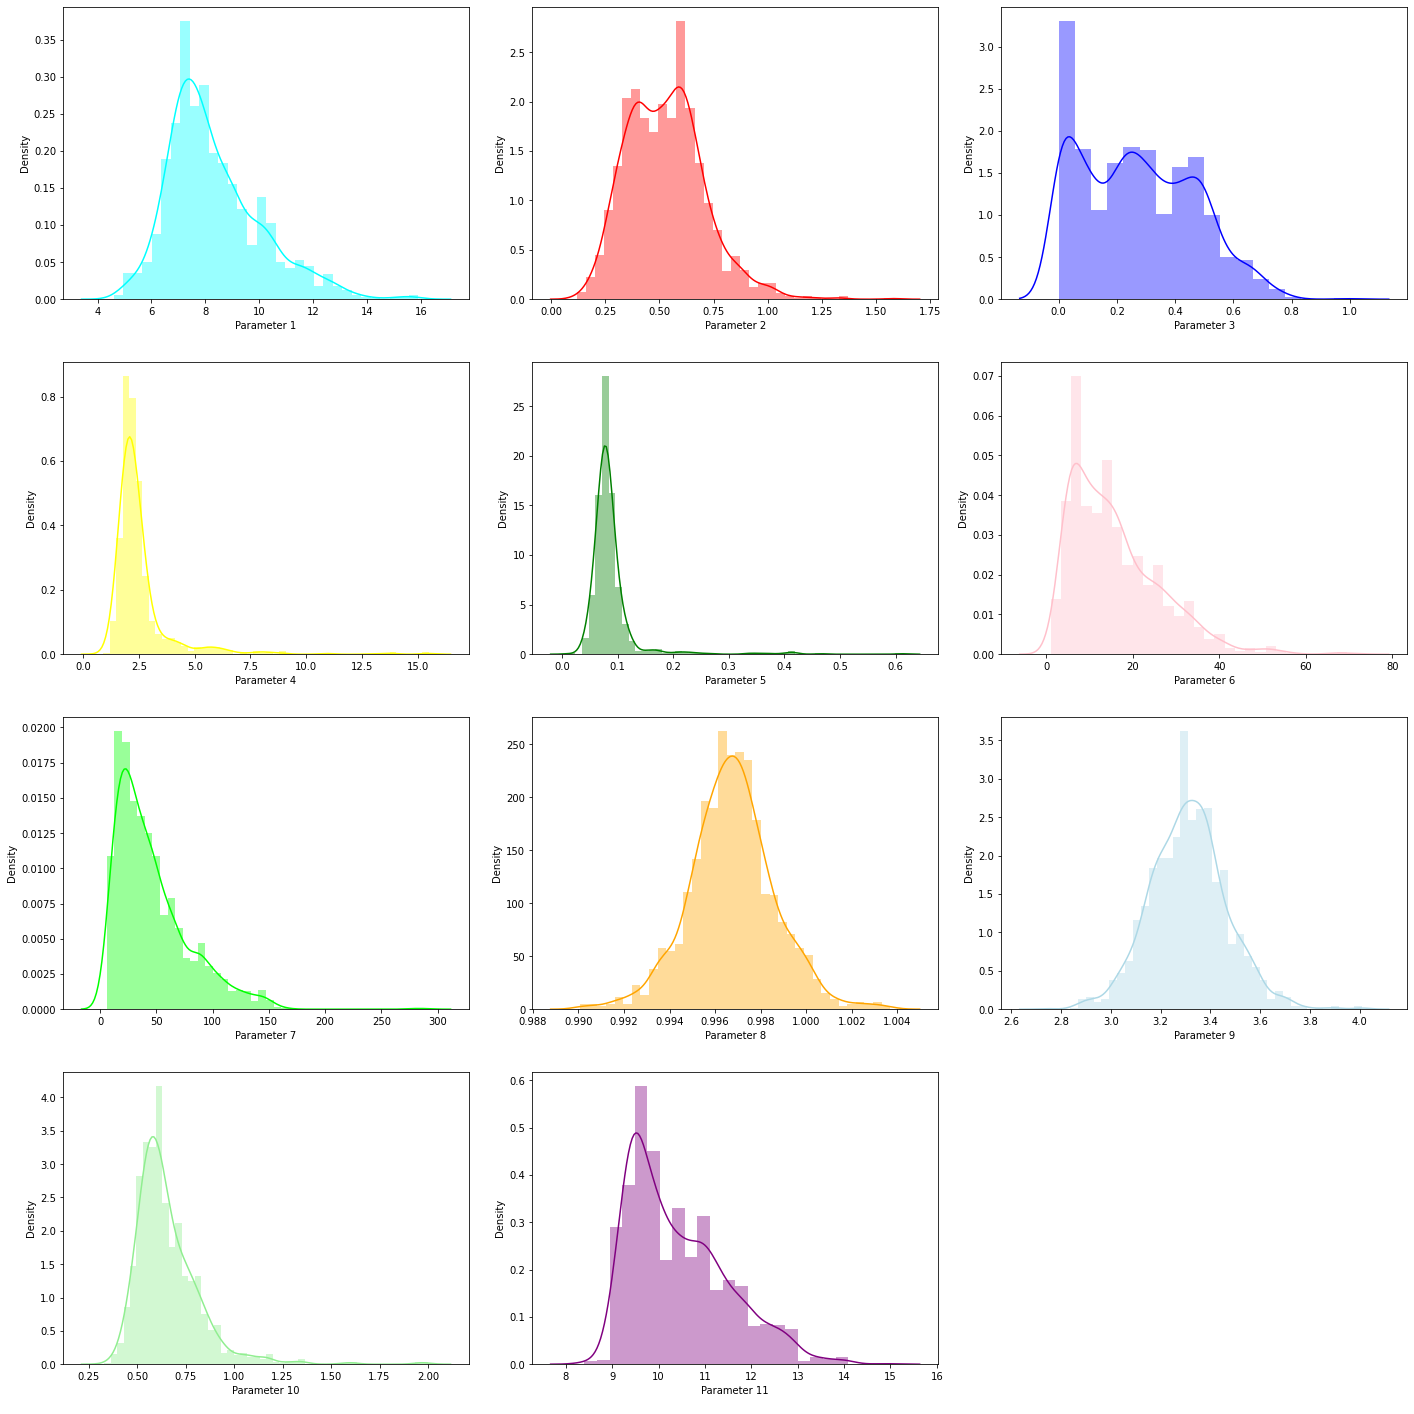

In [14]:
#### import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,20)) 
temp=df_sgnl.columns.drop("Signal_Strength")
colors = ['cyan','red','blue','yellow','green','pink','lime','orange','lightblue','lightgreen','purple']
for col in temp:
    index = df_sgnl.columns.get_loc(col)
    plt.subplot(4,3,index+1)
    sns.distplot(df_sgnl[col],color=colors[index])
    plt.xlabel("{}\n".format(col))
plt.tight_layout(pad=2.0)  

From 5 point summary and above distplot, its been observed that mean, median and mode are almost overlapping or too close to each other except in Parameter 7
Parameter 3 has three peaks 
All parmeters are positively skewed.
Standard deviation is maximum for Parameter7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


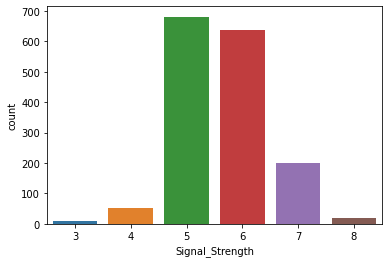

In [15]:
sns.countplot(df_sgnl['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

class 5.0 in 'Signal_Strength' has the highest count.

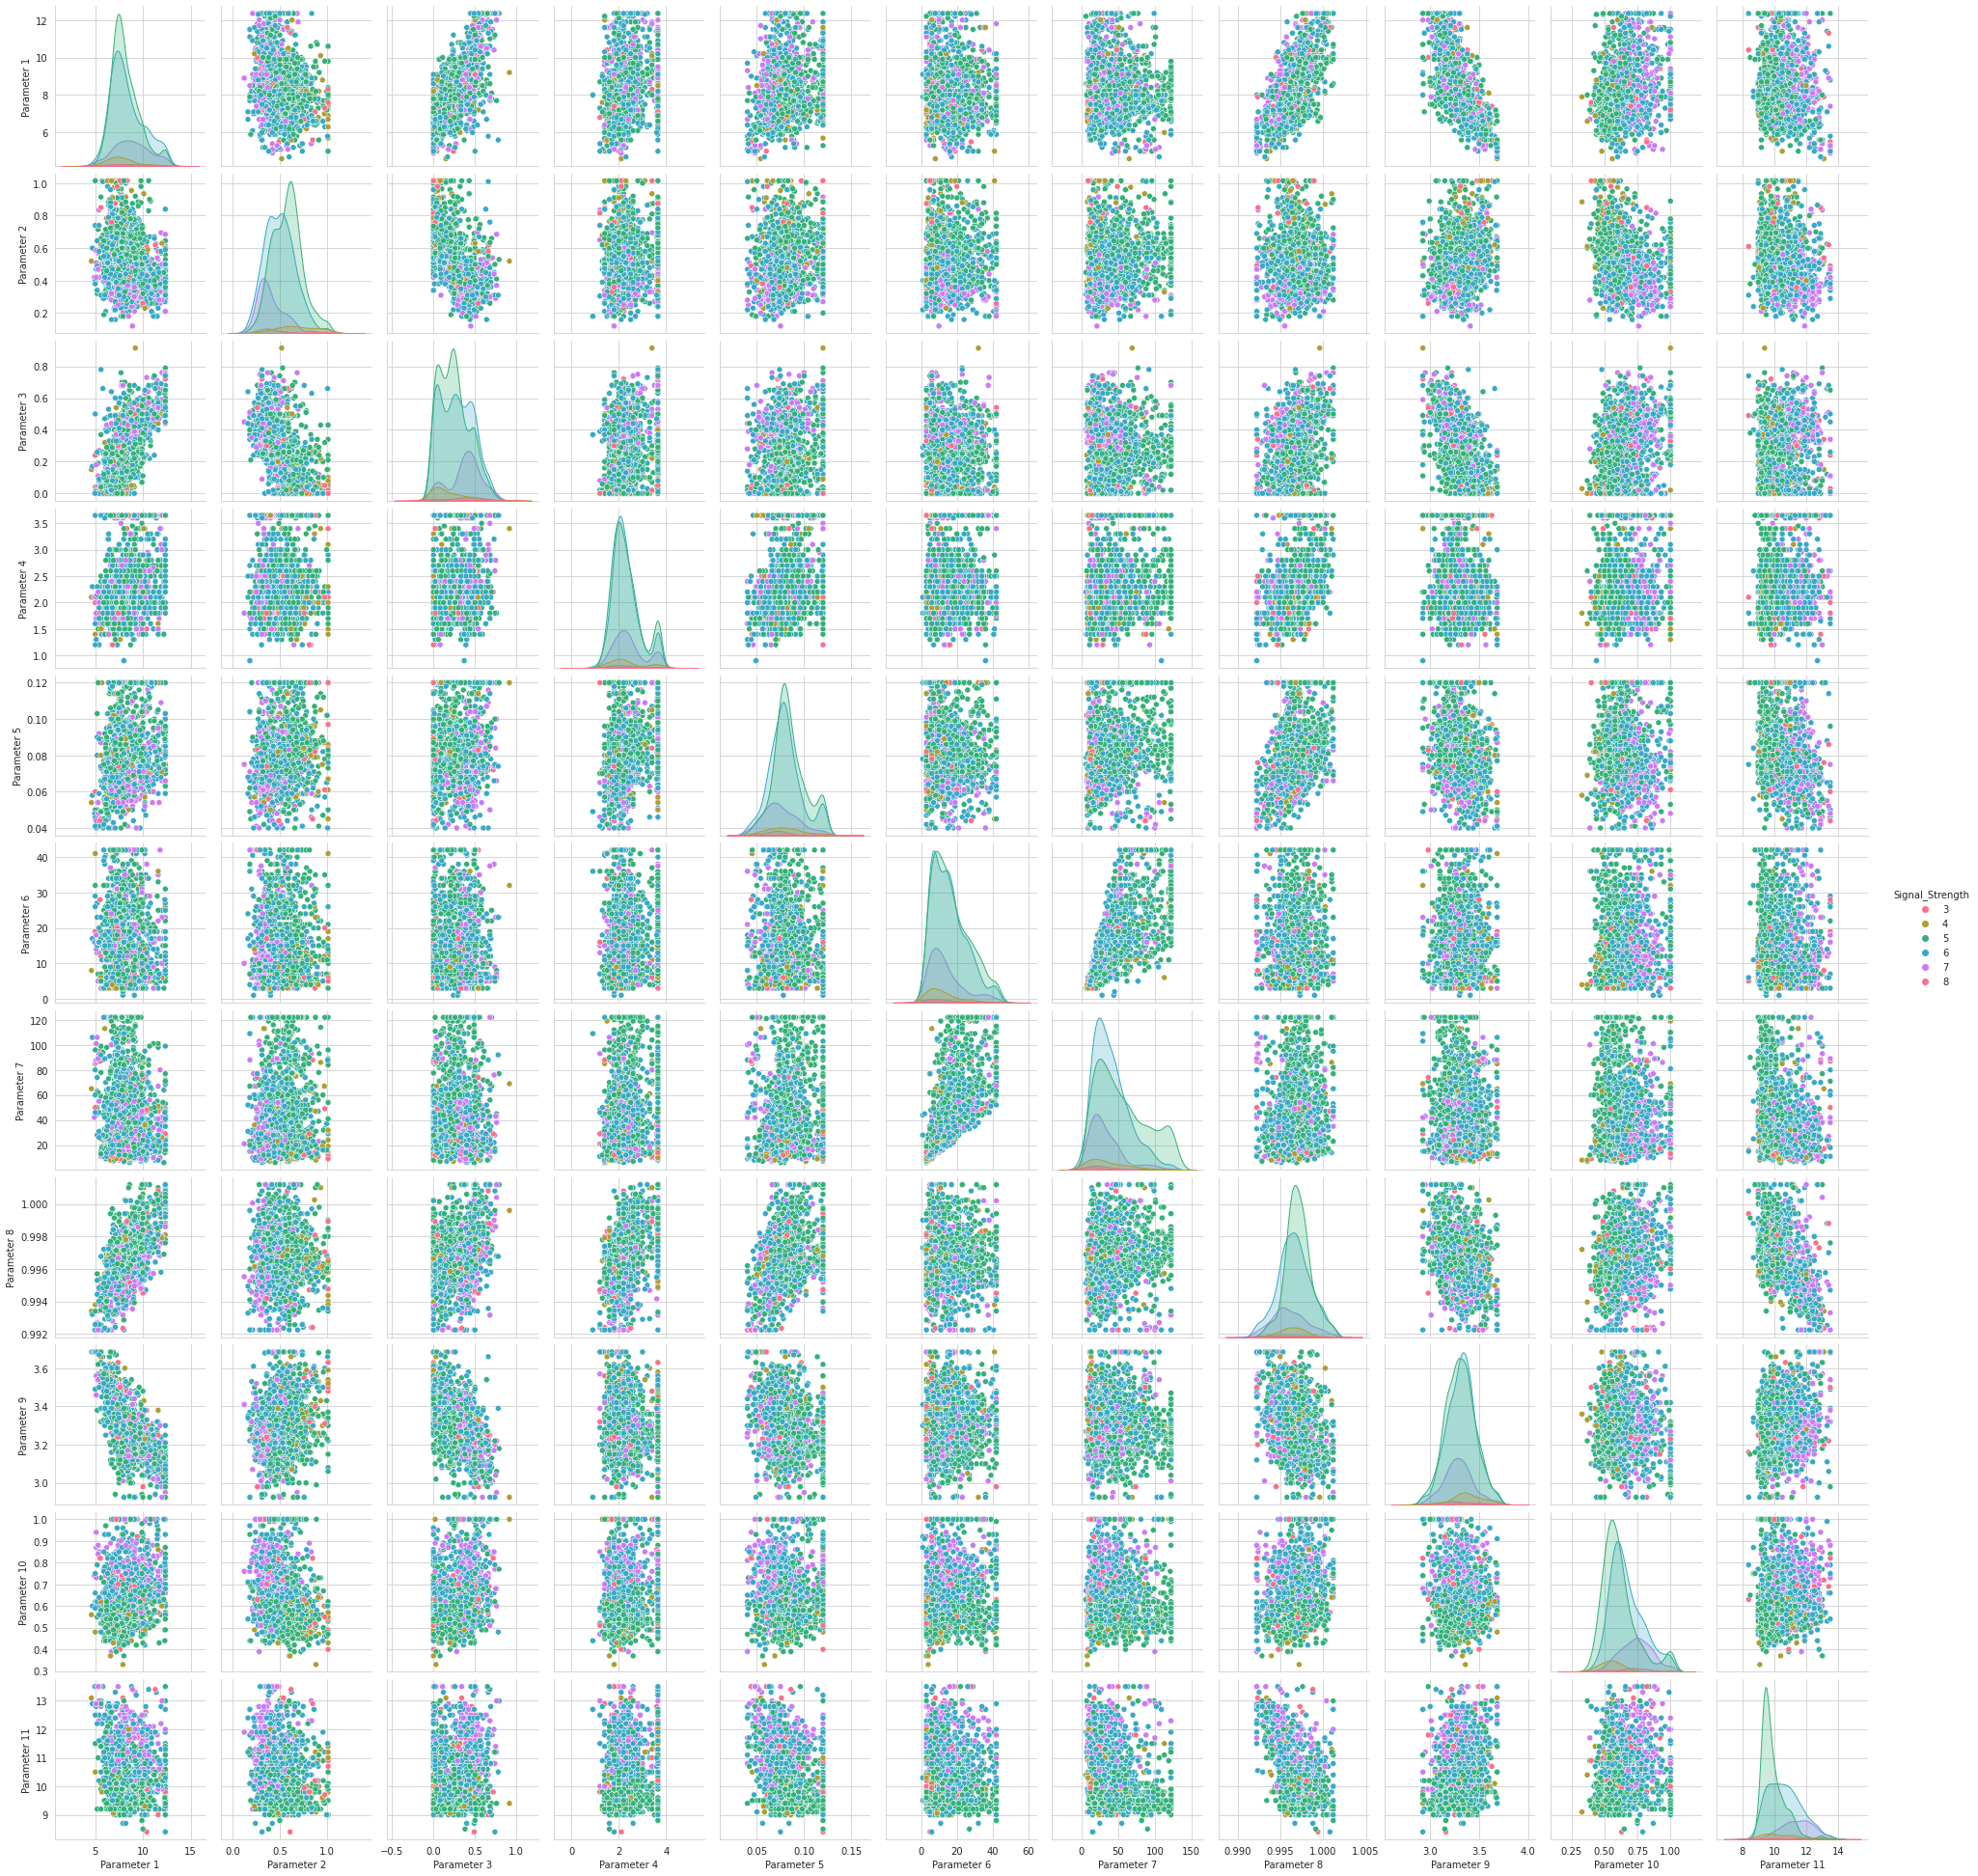

In [72]:

#sns.pairplot(df_sgnl,diag_kind='kde')
sns.pairplot(df_sgnl,hue='Signal_Strength',palette='husl')
plt.show()

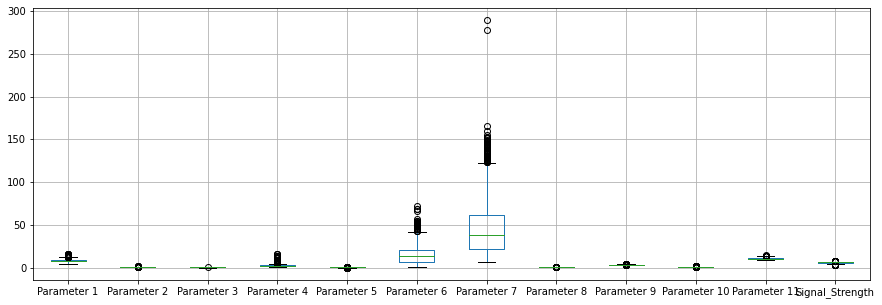

In [16]:
df_sgnl.boxplot(figsize=(15,5));

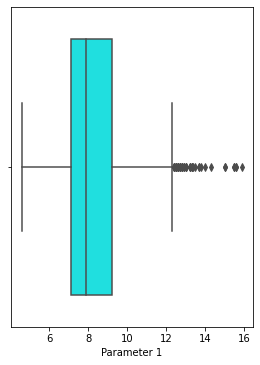

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Parameter 1 : Number of outliers are: 49


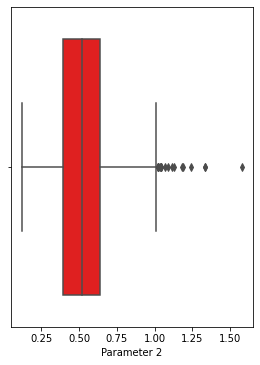

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Parameter 2 : Number of outliers are: 19


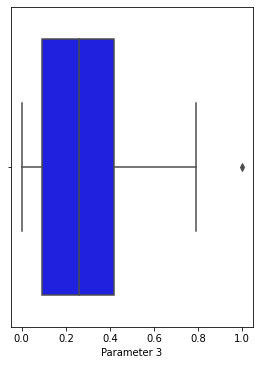

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Parameter 3 : Number of outliers are: 1


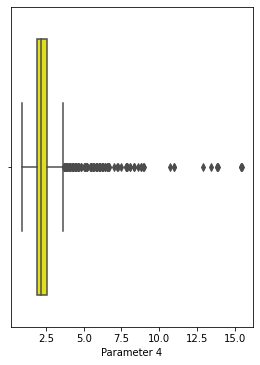

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Parameter 4 : Number of outliers are: 155


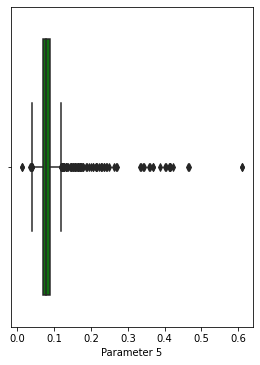

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Parameter 5 : Number of outliers are: 112


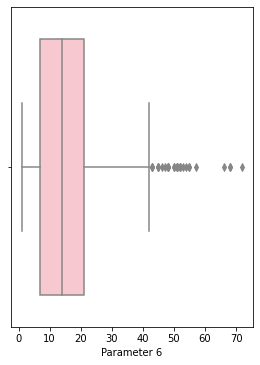

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Parameter 6 : Number of outliers are: 30


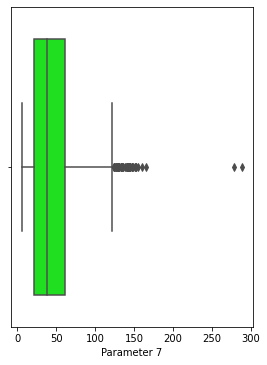

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Parameter 7 : Number of outliers are: 55


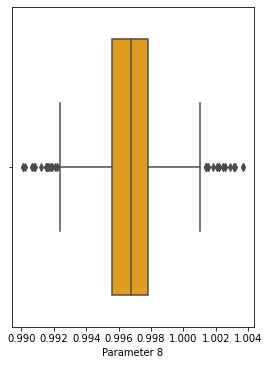

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.9978349999999999
IQR is: 0.002234999999999876
Parameter 8 : Number of outliers are: 45


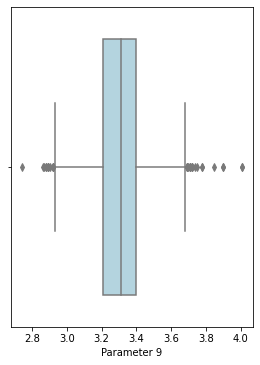

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Parameter 9 : Number of outliers are: 35


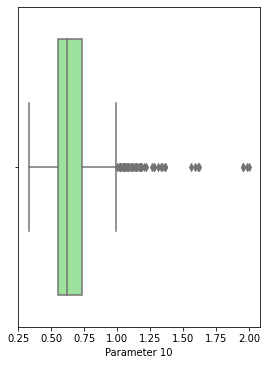

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Parameter 10 : Number of outliers are: 59


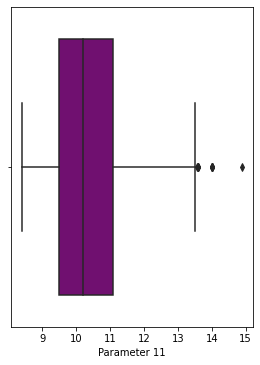

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Parameter 11 : Number of outliers are: 13


<Figure size 432x288 with 0 Axes>

In [17]:
# Checking outliers

temp=df_sgnl.columns.drop("Signal_Strength")
colors = ['cyan','red','blue','yellow','green','pink','lime','orange','lightblue','lightgreen','purple']
for col in temp:
    index = df_sgnl.columns.get_loc(col)
    plt.figure(figsize=(20,20))
    plt.subplot(3,4,index+1)
    #sns.distplot(df_sgnl[col],color=colors[index])
    sns.boxplot(x= df_sgnl[col], color=colors[index])
    plt.show()
    print('Boxplot of ',col)
    #calculating quantile
    Q1 = df_sgnl[col].quantile(0.25)
    Q2 = df_sgnl[col].quantile(0.50)
    Q3 = df_sgnl[col].quantile(0.75) 
    IQR = Q3 - Q1
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    bools = (df_sgnl[col] < (Q1 - 1.5 *IQR)) |(df_sgnl[col] > (Q3 + 1.5 * IQR))
    print(col,': Number of outliers are:',bools.sum())   #calculating the number of outliers
    
 
plt.tight_layout(pad=2.0) 

Parameter 4 has the highest number of outliers which is 155.

In [19]:
#  replacing outliers with upper and lower values
def replace_outliers(df,operation):
    cols=[]
    for col in df.columns:
        if( df[col].dtype =='float64' ):
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            if operation == 'fix':
                df.loc[df[col] > upper_boundary,col] = upper_boundary
                df.loc[df[col] < lower_boundary,col] = lower_boundary
         
    return (len(cols),df)

In [20]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=replace_outliers(df_sgnl,'fix')
if count>0:
    print('Updating dataset wrt outliers')
    df_sgnl=df

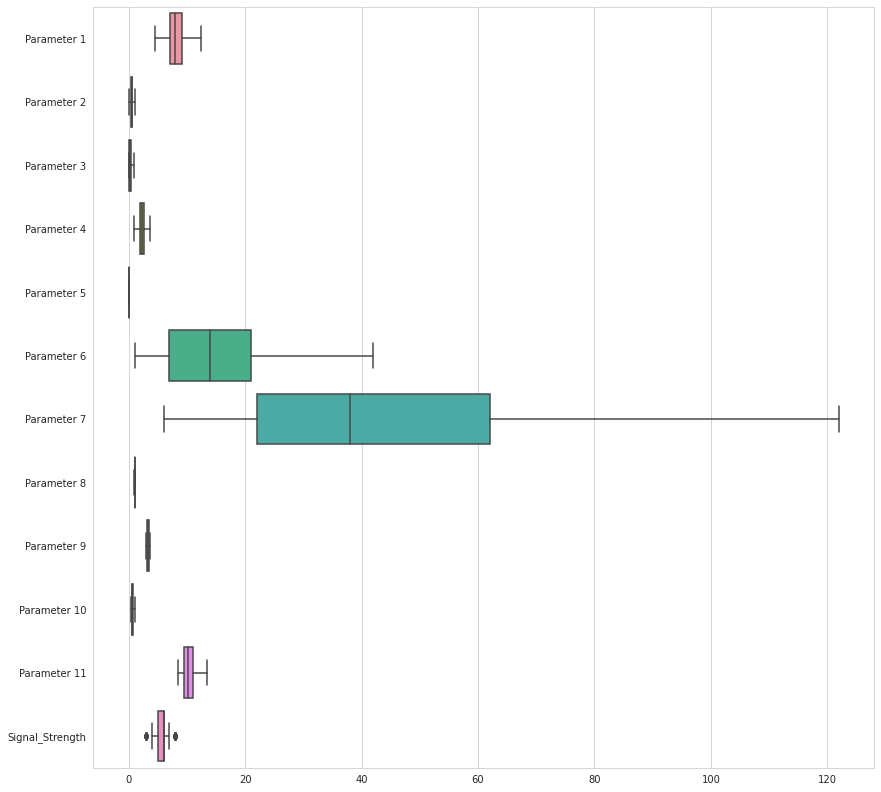

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,14))
sns.boxplot(data=df_sgnl, orient="h")

Text(0.5, 1.0, 'Correlation Matrix')

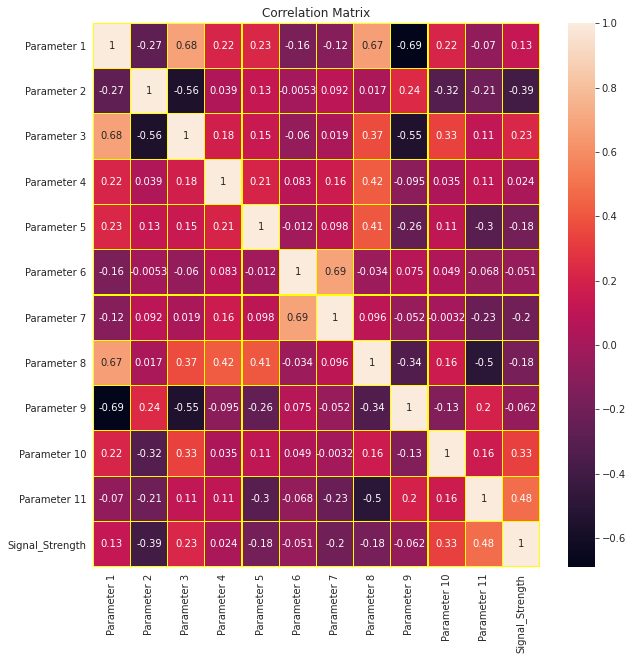

In [22]:
# Plotting Correlation Matrix to check correlation between attributes
plt.figure(figsize=(10, 10))
sns.heatmap(df_sgnl.corr(),linewidths=0.1,vmax=1.0, 
            linecolor='yellow', annot=True)
plt.title('Correlation Matrix')

From above correlation Matrix,
Parameter 1 is highly correlated with Parameter 3, Parameter 8, Parameter 9.
Also Parameter 6 and 7 are highly correlated.
But since, the correlation is not too high, its in the scale of less than 0.7, 
So not dropping the features.

3. Design, train, tune and test a neural network regressor. 

In [23]:
# Separating dependent and independent variables
X = df_sgnl.drop("Signal_Strength", axis=1)
y = df_sgnl['Signal_Strength']

In [24]:
def getData():
  print(X.shape)
  return X

def getTarget():
  print(y.shape)
  return y

In [25]:
getData()
getTarget()

(1599, 11)
(1599,)


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: Signal_Strength, Length: 1599, dtype: int64

In [26]:
from keras import backend as K
# Function to calculate R_2 score to be used as metric
def r_2_score(y_true, y_pred):
  ss_res= K.sum(K.square(y_true - y_pred))
  ss_total=K.sum(K.square(y_true- K.mean(y_true)))
  return (1 - ss_res/(ss_total+0.0000000001))

In [34]:
#### Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=10)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

mm = MinMaxScaler()
X_train_sc = np.array(mm.fit_transform(X_train))
X_test_sc = np.array(mm.transform(X_test))

In [35]:
print(X_train_sc.shape,y_train.shape)

(1119, 11) (1119,)


In [36]:
# fix random seed for reproducibility
seed = 10
np.random.seed(seed)



Hyperparameter tuning for batch size and epochs

In [73]:
# Hyperparameter tuning : batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model1():
	# create model
  model = Sequential()
  model.add(tf.keras.Input(shape=(11)))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(1, activation='linear'))
  # Compile model
  model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model1, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 32, 64, 100]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.033052 using {'batch_size': 10, 'epochs': 10}


In [74]:
# Hyperparameter tuning : activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model2(activation='relu'):
  # create model
  model = Sequential()
  model.add(tf.keras.Input(shape=(11)))
  model.add(Dense(12, activation=activation))
  model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
  # Compile model
  model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy'])
  return model


# create model
model = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ('relu', 'softmax', 'softplus', 'tanh', 'sigmoid', 'linear')
param_grid = dict(activation=activation)
print (param_grid)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

{'activation': ('relu', 'softmax', 'softplus', 'tanh', 'sigmoid', 'linear')}
Best: 0.033052 using {'activation': 'relu'}


In [47]:
# Hyperparameter tuning :  dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model3(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
	# Compile model
	model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy'])
	return model


# create model
model = KerasClassifier(build_fn=create_model3, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.033052 using {'dropout_rate': 0.01, 'weight_constraint': 1}


In [75]:
# Hyperparameter tuning :  learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.preprocessing import Normalizer
# Function to create model, required for KerasClassifier
def create_model4(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=11, activation='relu'))
	model.add(Dense(1, activation='linear'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model4, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.2, 0.3]
momentum = [0.1, 0.2, 0.4, 0.6, 0.8, 1]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.033052 using {'learn_rate': 0.01, 'momentum': 0.1}


Using above tuning parameter to create a Regressor model

In [50]:
# Design, train, tune and test a neural network regressor.
def trainNNRegreesor():
    # Initialize Sequential model
    model_reg = tf.keras.models.Sequential()
    #input layer
    model_reg.add(tf.keras.Input(shape=(11)))
    model_reg.add(tf.keras.layers.Dense(9, activation='relu'))
    model_reg.add(tf.keras.layers.Dropout(rate=0.15))
    model_reg.add(tf.keras.layers.Dense(5, activation='softmax'))
    model_reg.add(tf.keras.layers.Dropout(rate=0.15))
    # Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
    #output
    model_reg.add(tf.keras.layers.Dense(1, activation='linear'))
    
    # Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
    optimizer = SGD(lr=0.01, momentum=0.1)
    model_reg.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['MeanSquaredError'])

    model_reg.fit(X_train_sc, y_train, epochs=100, verbose=1, validation_data=(X_test_sc, y_test), batch_size=10)
    return model_reg

In [51]:
model_reg = trainNNRegreesor()


Epoch 1/100
112/112 [==============================] - 1s 4ms/step - loss: 13.2908 - mean_squared_error: 13.2908 - val_loss: 0.7044 - val_mean_squared_error: 0.7044
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 1.2874 - mean_squared_error: 1.2874 - val_loss: 0.6982 - val_mean_squared_error: 0.6982
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 1.0454 - mean_squared_error: 1.0454 - val_loss: 0.6959 - val_mean_squared_error: 0.6959
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 1.0062 - mean_squared_error: 1.0062 - val_loss: 0.7012 - val_mean_squared_error: 0.7012
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.7902 - mean_squared_error: 0.7902 - val_loss: 0.7157 - val_mean_squared_error: 0.7157
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.7052 - mean_squared_error: 0.7052 - val_loss: 0.6970 - val_mean_squared_error: 0.6970
Epoch 7/100
112/112 

4. Pickle the model for future use.

In [52]:
# save the model
def pickle_reg_saved():
  # save the model
  model_reg.save("model_reg.h5") #using h5 extension
  print("Regressor model saved!!!")

In [53]:
pickle_reg_saved()

Regressor model saved!!!


In [54]:
def runSavedModel_reg():
  # load the model
  model_regression = load_model('model_reg.h5')
  # calculate score of training data
  y_pred = model_reg.predict(X_test_sc)
  print("y_pred")
  print(y_pred[0])
  print(y_pred[1])
  print(y_pred[2])
  print(y_pred[3])
  print(y_pred[4])
  print("y_test\n",y_test.head(5))
  score_r = r2_score(y_test,y_pred)
  print("\n score ",score_r)
  #summary of classification model
  print("\n summary ")
  model_regression.summary()

In [55]:
runSavedModel_reg()

y_pred
[5.702759]
[5.237142]
[5.64253]
[5.5228148]
[5.369715]
y_test
 1518    5
1246    5
544     6
1343    6
428     5
Name: Signal_Strength, dtype: int64

 score  0.34086266245651986

 summary 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 9)                 108       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 50        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 164
Trainable params: 164
Non-trainable pa

The first 5 elements of y_pred and y_test are close.

# Part 2

# PROJECT OBJECTIVE: The need is to build a classifier which can use these parameters to determine the signal strength or quality .

Steps 1 and 2 are same as for the regressor above

3. Design, train, tune and test a neural network classifier.

In [56]:
# counting the number of classes in output
df_sgnl['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [57]:
X.shape

(1599, 11)

In [58]:
y.shape

(1599,)

In [69]:
yc = to_categorical(y)
# splitting data for test of categorial 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, yc, test_size=.30, random_state=10)
print("Shape of y_train:", y_train1.shape)
print(" y_train:", y_train1[666])

Shape of y_train: (1119, 9)
 y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [60]:
yc[2]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [63]:
#neural network classifier..
def trainNNClassifier():
    #Creating Model
    model_cl = tf.keras.models.Sequential()
    model_cl.add(Dense(11, activation='relu'))
    model_cl.add(Dense(9, activation='relu'))
    model_cl.add(Dense(9, activation='relu'))
    model_cl.add(Dense(9, activation='softmax'))

    # Compile the model
    model_cl.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

    # Fit the model
    model_cl.fit(x=X_train1, y=y_train1, batch_size=10, epochs=100)
    return model_cl

In [64]:
model_cl = trainNNClassifier()

Epoch 1/100
112/112 [==============================] - 0s 1ms/step - loss: 1.7039 - accuracy: 0.3821
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 1.2198 - accuracy: 0.4767
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1859 - accuracy: 0.4949
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1411 - accuracy: 0.4732
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1243 - accuracy: 0.5483
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1386 - accuracy: 0.4887
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1343 - accuracy: 0.5047
Epoch 8/100
112/112 [==============================] - 0s 972us/step - loss: 1.1246 - accuracy: 0.5116
Epoch 9/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1282 - accuracy: 0.4960
Epoch 10/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1019 - accu

4. Pickle the model for future use.

In [65]:
def pickle_Cl_saved():
  # save the model
  model_cl.save("model_class.h5") #using h5 extension
  print("Classifer model saved!!!")

In [66]:
pickle_Cl_saved()

Classifer model saved!!!


In [67]:
def runSavedModel_cl():
  # load the model
  model_cl = load_model('model_class.h5')
  # calculate score of training data
  score = model_cl.evaluate(X_train1, y_train1, verbose=0)
  print(score)
  # score of test data
  score_t = model_cl.evaluate(X_test1, y_test1, verbose=0)
  print( score_t)
  #summary of classification model
  model_cl.summary()

In [68]:
runSavedModel_cl()

[1.0958788394927979, 0.5120643377304077]
[1.1826956272125244, 0.47083333134651184]
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_26 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_27 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_28 (Dense)             (None, 9)                 90        
Total params: 420
Trainable params: 420
Non-trainable params: 0
_________________________________________________________________


# **Neural network GUI**

In [70]:
import ipywidgets as widgets
from IPython.display import display
widgets.Label(value='Neural network GUI', disabled=True)

Label(value='Neural network GUI')

In [71]:
step1 = widgets.Label(value='FileName', disabled=True)
signal_btn = widgets.Button(description='Signal.csv')
import_data_btn = widgets.Button(description='Import Data')
done_btn = widgets.Button(description='Done',style = {'button_color': 'yellow'})

step2 = widgets.Label(value='TargetColumn', disabled=True)
signal_strength_btn = widgets.Button(description='Signal_Strength')
import_target_btn = widgets.Button(description='Import Target')
found_btn = widgets.Button(description='Found',style = {'button_color': 'yellow'})


step3 = widgets.Label(value='Neural Network Regressor', disabled=True)
regression = widgets.Label(value='Regression', disabled=True)
train_reg_btn = widgets.Button(description='Train')
network_reg_btn = widgets.Button(description='Network Trained',style = {'button_color': 'yellow'})
pickle_reg = widgets.Label(value='Pickle', disabled=True)
pickle_reg_btn = widgets.Button(description='Run')
save_reg_btn = widgets.Button(description='Save Model to Disk')


step4 = widgets.Label(value='Neural Network Classifier', disabled=True)
classifier = widgets.Label(value='Classifier', disabled=True)
train_cl_btn = widgets.Button(description='Train')
network_cl_btn = widgets.Button(description='Network Trained', style = {'button_color': 'yellow'})
pickle_cl = widgets.Label(value='Pickle', disabled=True)
pickle_cl_btn = widgets.Button(description='Run')
save_cl_btn = widgets.Button(description='Save Model to Disk')

display(widgets.Label(value='Neural network GUI', disabled=True ))

input_widgets1 = widgets.HBox([step1, signal_btn, import_data_btn,done_btn])
input_widgets2 = widgets.HBox([step2, signal_strength_btn, import_target_btn,found_btn])
input_widgets3_1 = widgets.HBox([regression,train_reg_btn,network_reg_btn])
input_widgets3_2 = widgets.HBox([pickle_reg,pickle_reg_btn,save_reg_btn])
input_widgets4_1 = widgets.HBox([classifier,train_cl_btn,network_cl_btn])
input_widgets4_2 = widgets.HBox([pickle_cl,pickle_cl_btn,save_cl_btn])

display(input_widgets1,input_widgets2,step3,input_widgets3_1,input_widgets3_2,step4,input_widgets4_1,input_widgets4_2)
step5 = widgets.Button(description='Clear Output')
display(step5)
#-------------------------------------------------------
output = widgets.Output()
display(output)
def signal_csv_import_cb(df_sgnl):
  output.clear_output()
  with output:
        signal_csv_import()
        display(displaySignal().head(5))

#display(import_data_btn,output)
def importdata_cb(b):
  output.clear_output()
  with output:
        getData()
  done_btn.style.button_color = 'green'

#display(import_target_btn,output)
def importTarget_cb(b):
  output.clear_output()
  with output:
        getTarget()
  found_btn.style.button_color = 'green'

signal_btn.on_click(signal_csv_import_cb)
import_data_btn.on_click(importdata_cb)
import_target_btn.on_click(importTarget_cb)


def trainNNRegreesor_cb(b):
  output.clear_output()
  with output:
       trainNNRegreesor()
  network_reg_btn.style.button_color = 'green'

train_reg_btn.on_click(trainNNRegreesor_cb)

def trainNNClassifier_cb(b):
  output.clear_output()
  with output:
       trainNNClassifier()
  network_cl_btn.style.button_color = 'green'

train_cl_btn.on_click(trainNNClassifier_cb)


def save_reg_btn_cb(b):
   output.clear_output()
   with output:
        return pickle_reg_saved()

save_reg_btn.on_click(save_reg_btn_cb)

def runSavedModel_reg_cb(b):
   output.clear_output()
   with output:
        return runSavedModel_reg()
pickle_reg_btn.on_click(runSavedModel_reg_cb)

def save_cl_btn_cb(b):
   output.clear_output()
   with output:
        return pickle_Cl_saved()

save_cl_btn.on_click(save_cl_btn_cb)

def runSavedModel_cl_cb(b):
   output.clear_output()
   with output:
        return runSavedModel_cl()

pickle_cl_btn.on_click(runSavedModel_cl_cb)

def clear_output_cb(b):
   output.clear_output()
   with output:
       output.clear_output()
   done_btn.style.button_color = 'lightyellow'
   found_btn.style.button_color = 'lightyellow'
   network_reg_btn.style.button_color = 'lightyellow'
   network_cl_btn.style.button_color = 'lightyellow'    


step5.on_click(clear_output_cb)

Label(value='Neural network GUI')

Label(value='Neural Network Regressor')

Label(value='Neural Network Classifier')

Button(description='Clear Output', style=ButtonStyle())

Output()